In [1]:
import pandas as pd

In [2]:
import numpy as np
import requests

In [3]:
# url = "https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-sep14.csv"
# source = requests.get(url).text
# !wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
# print('Data downloaded!')


In [4]:
# df = pd.read_cvs(source, header = 0)[0]


In [5]:
df = pd.read_csv("uberrawdata.csv")


In [6]:
# url = "https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-sep14.csv"
# df = pd.read_csv(url, error_bad_lines=False)

In [7]:
df.head()

,Unnamed: 0,Date/Time,Lat,Lon,Base
0,0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [8]:
# df.to_csv("uberrawdata.csv", sep=',')

In [9]:
# df=pd.read_csv?

In [10]:
df["Date/Time"].head()

0    9/1/2014 0:01:00
1    9/1/2014 0:01:00
2    9/1/2014 0:03:00
3    9/1/2014 0:06:00
4    9/1/2014 0:11:00
Name: Date/Time, dtype: object

In [11]:
dt=df["Date/Time"]

In [12]:
# d,t=dt.split(' ')
dt='9/1/2014 0:01:00'

In [13]:
d,t = dt.split(' ')
print(d)
print(t)

9/1/2014
0:01:00


In [14]:
d.split("/")

['9', '1', '2014']

In [15]:
dt = pd.to_datetime(dt)

In [16]:
dt

Timestamp('2014-09-01 00:01:00')

In [17]:
dt.date()

datetime.date(2014, 9, 1)

In [18]:
print("Month: {}".format(dt.month))
print("Day: {}".format(dt.day))
print("Year: {}".format(dt.year))


Month: 9
Day: 1
Year: 2014


## Dropping some rows

In [19]:
df.drop(df.index[3:50000], inplace =True)
# ;
# Shape of DataFrame
print('Shape: {}'.format(df.shape))

Shape: (978139, 5)


## Resetting Index after Dropping some Rows

In [20]:
df = df.reset_index(drop=True)
df.head(11)

,Unnamed: 0,Date/Time,Lat,Lon,Base
0,0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,50000,9/3/2014 16:00:00,40.7471,-73.9897,B02598
4,50001,9/3/2014 16:00:00,40.7596,-73.9843,B02598
5,50002,9/3/2014 16:00:00,40.7700,-73.9892,B02598
6,50003,9/3/2014 16:00:00,40.7372,-73.9926,B02598
7,50004,9/3/2014 16:00:00,40.7100,-74.0061,B02598
8,50005,9/3/2014 16:00:00,40.7145,-74.0115,B02598
9,50006,9/3/2014 16:00:00,40.7741,-73.9632,B02598


## How to Drop Unnamed Col Indexing

In [21]:
df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/3/2014 16:00:00,40.7471,-73.9897,B02598
4,9/3/2014 16:00:00,40.7596,-73.9843,B02598


In [22]:
df["Date/Time"] = df["Date/Time"].map(pd.to_datetime)

In [23]:
df.tail()

,Date/Time,Lat,Lon,Base
978134,2014-09-30 22:57:00,40.7668,-73.9845,B02764
978135,2014-09-30 22:57:00,40.6911,-74.1773,B02764
978136,2014-09-30 22:58:00,40.8519,-73.9319,B02764
978137,2014-09-30 22:58:00,40.7081,-74.0066,B02764
978138,2014-09-30 22:58:00,40.7140,-73.9496,B02764


In [24]:
def get_dom(dt):
    return dt.day

In [25]:
df['DOM'] = df['Date/Time'].map(get_dom)

In [26]:
df.head()

,Date/Time,Lat,Lon,Base,DOM
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1
3,2014-09-03 16:00:00,40.7471,-73.9897,B02598,3
4,2014-09-03 16:00:00,40.7596,-73.9843,B02598,3


#### GEtting HOurs

In [27]:
def get_hours(dt):
    return dt.hour

In [28]:
df['hour'] = df['Date/Time'].map(get_hours)

In [29]:
df.tail()

,Date/Time,Lat,Lon,Base,DOM,hour
978134,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,22
978135,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,22
978136,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,22
978137,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,22
978138,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30,22


In [30]:
# Getting WeekDay

In [31]:
def get_weekday(dt):
    return dt.weekday()

In [32]:
df["WeekDay"] = df["Date/Time"].map(get_weekday)

In [33]:
df.head()

,Date/Time,Lat,Lon,Base,DOM,hour,WeekDay
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-03 16:00:00,40.7471,-73.9897,B02598,3,16,2
4,2014-09-03 16:00:00,40.7596,-73.9843,B02598,3,16,2


## Analysis

In [34]:
%pylab inline
import seaborn

Populating the interactive namespace from numpy and matplotlib


### Analysis of DOM

Text(0.5, 1.0, 'Frequency of DOM Uber-Aug 2014')

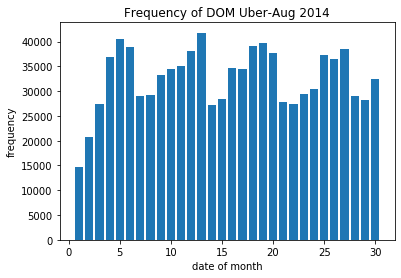

In [35]:
hist(df.DOM, bins=30, rwidth=.8, range=(.5,30.5))

xlabel('date of month')
ylabel('frequency')
title('Frequency of DOM Uber-Aug 2014')

In [36]:
for k, rows in df.groupby('DOM'):
#     print((k, (rows)))
    print((k, len(rows)))
    

(1, 14700)
(2, 20673)
(3, 27313)
(4, 36847)
(5, 40511)
(6, 38940)
(7, 29010)
(8, 29149)
(9, 33306)
(10, 34536)
(11, 35074)
(12, 38117)
(13, 41779)
(14, 27276)
(15, 28371)
(16, 34753)
(17, 34373)
(18, 39027)
(19, 39669)
(20, 37760)
(21, 27786)
(22, 27395)
(23, 29450)
(24, 30441)
(25, 37188)
(26, 36551)
(27, 38463)
(28, 28922)
(29, 28296)
(30, 32463)


In [37]:
# Using Function count_rows
def count_rows(rows):
    return len(rows)

In [38]:
by_date = df.groupby('DOM').apply(count_rows)
by_date

DOM
1     14700
2     20673
3     27313
4     36847
5     40511
6     38940
7     29010
8     29149
9     33306
10    34536
11    35074
12    38117
13    41779
14    27276
15    28371
16    34753
17    34373
18    39027
19    39669
20    37760
21    27786
22    27395
23    29450
24    30441
25    37188
26    36551
27    38463
28    28922
29    28296
30    32463
dtype: int64

(array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 2., 2., 4., 2.,
        1., 0., 1., 1., 2., 2., 0., 3., 2., 3., 1., 1., 1.]),
 array([14700.        , 15602.63333333, 16505.26666667, 17407.9       ,
        18310.53333333, 19213.16666667, 20115.8       , 21018.43333333,
        21921.06666667, 22823.7       , 23726.33333333, 24628.96666667,
        25531.6       , 26434.23333333, 27336.86666667, 28239.5       ,
        29142.13333333, 30044.76666667, 30947.4       , 31850.03333333,
        32752.66666667, 33655.3       , 34557.93333333, 35460.56666667,
        36363.2       , 37265.83333333, 38168.46666667, 39071.1       ,
        39973.73333333, 40876.36666667, 41779.        ]),
 <a list of 30 Patch objects>)

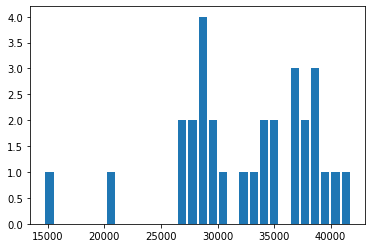

In [39]:
hist(by_date, bins=30, rwidth=.8, )

<BarContainer object of 30 artists>

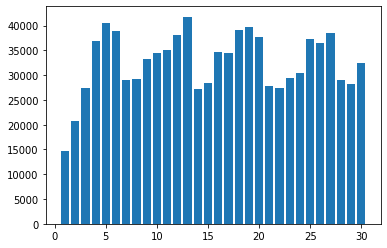

In [40]:
bar(range(1, 31), by_date)
# xticks(range(1,31), by_date)
# ;

In [41]:
# Sorted Order of frequency
by_date_sorted = by_date.sort_values()
by_date_sorted

DOM
1     14700
2     20673
14    27276
3     27313
22    27395
21    27786
29    28296
15    28371
28    28922
7     29010
8     29149
23    29450
24    30441
30    32463
9     33306
17    34373
10    34536
16    34753
11    35074
26    36551
4     36847
25    37188
20    37760
12    38117
27    38463
6     38940
18    39027
19    39669
5     40511
13    41779
dtype: int64

Text(0.5, 1.0, 'Frequency of DOM Uber-Aug 2014')

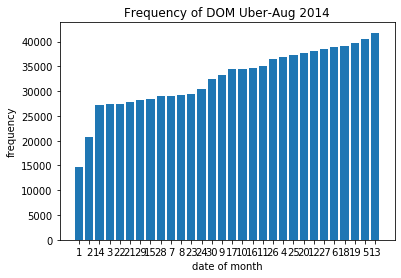

In [42]:
bar(range(1, 31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index)
;
xlabel('date of month')
ylabel('frequency')
title('Frequency of DOM Uber-Aug 2014')

### Analysis of WeekDay

In [43]:
wd = df['WeekDay']
df.head(2)

,Date/Time,Lat,Lon,Base,DOM,hour,WeekDay
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0


Text(0.5, 1.0, 'Frequency of WeekDay Uber-Aug 2014')

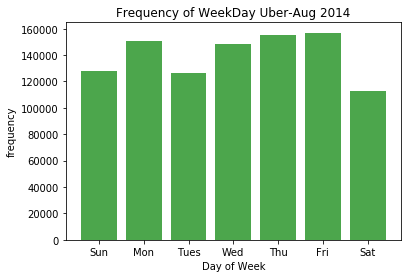

In [44]:
hist(df.WeekDay,bins=7, range=(-.5,6.5), color='green',  rwidth=.8, alpha=.7)
xticks(range(7), 'Sun Mon Tues Wed Thu Fri Sat '.split())
xlabel('Day of Week')
ylabel('frequency')
title('Frequency of WeekDay Uber-Aug 2014')

In [45]:
by_weekday = df.groupby('WeekDay').apply(count_rows)
by_weekday

WeekDay
0    127911
1    150645
2    126663
3    148136
4    154848
5    156942
6    112994
dtype: int64

(array([1., 0., 2., 0., 0., 2., 2.]),
 array([112994.        , 119272.28571429, 125550.57142857, 131828.85714286,
        138107.14285714, 144385.42857143, 150663.71428571, 156942.        ]),
 <a list of 7 Patch objects>)

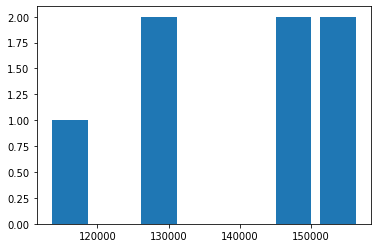

In [46]:
hist(by_weekday, bins=7, rwidth=.8, )

<BarContainer object of 30 artists>

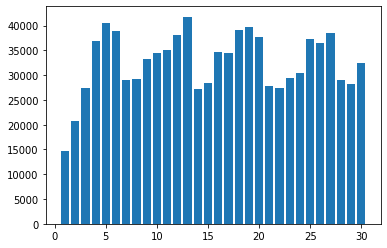

In [47]:
bar(range(1, 31), by_date)


### Cross Analysis

In [48]:
df.groupby('hour WeekDay'.split()).apply(count_rows)

hour  WeekDay
0     0           1683
      1           1314
      2           1375
      3           1713
      4           2455
      5           6716
      6           7928
1     0           1081
      1            726
      2            821
      3           1004
      4           1506
      5           4630
      6           5799
2     0            876
      1            579
      2            560
      3            698
      4            979
      5           2890
      6           3773
3     0           1651
      1           1100
      2            901
      3           1067
      4           1315
      5           1996
      6           2324
4     0           2342
      1           1905
                 ...  
19    5          11010
      6           6235
20    0           7712
      1           9622
      2           8821
      3           9749
      4           9986
      5           9525
      6           5760
21    0           6492
      1           8389
      2           76

In [49]:
# More ease of understanding
df.groupby('hour WeekDay'.split()).apply(count_rows).unstack()

WeekDay,0,1,2,3,4,5,6
hour,,,,,,,
0,1683,1314,1375,1713,2455,6716,7928
1,1081,726,821,1004,1506,4630,5799
2,876,579,560,698,979,2890,3773
3,1651,1100,901,1067,1315,1996,2324
4,2342,1905,1489,1679,1774,1434,1469
5,3720,3874,2882,2687,3025,1511,1577
6,5395,6871,5206,5435,5040,2040,1633
7,6875,8770,6431,7545,6485,2719,2207
8,6944,8684,6066,7432,6477,3546,2989


In [50]:
by_cross = df.groupby('hour WeekDay'.split()).apply(count_rows).unstack()

In [51]:
# seaborn.heatmap(by_cross)

### By Lat and Long

''

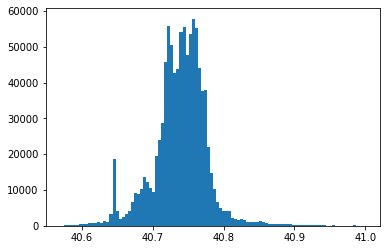

In [54]:
hist(df['Lat'], bins=100, range=(40.57, 41) )
;

''

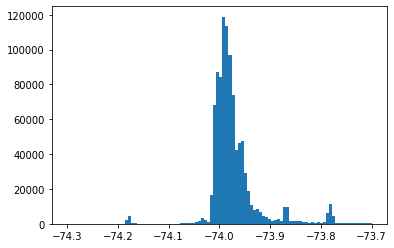

In [56]:
hist(df['Lon'], bins=100, range=(-74.3, -73.7) )
;

''

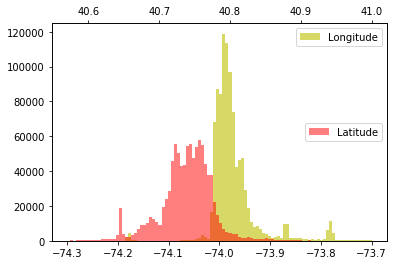

In [71]:
hist(df['Lon'], bins=100, range=(-74.3, -73.7), color='y', alpha=.6 , label='Longitude')
# grid()
legend(loc='upper right')
twiny()
hist(df['Lat'], bins=100, range=(40.57, 41), color='r', alpha=.5, label='Latitude'  )
legend(loc='center right')

;

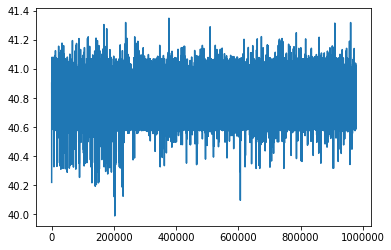

In [72]:
plot(df['Lat'])

(0, 111)

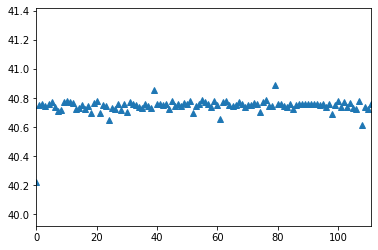

In [77]:
plot(df['Lat'], '^')
xlim(0,111)

(0, 111)

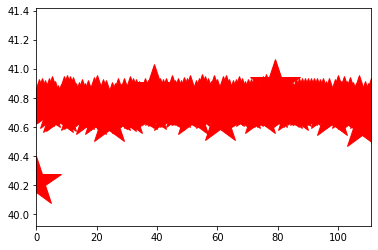

In [87]:
plot(df['Lat'], '*', ms=52, color='r')
xlim(0,111)

(0, 111)

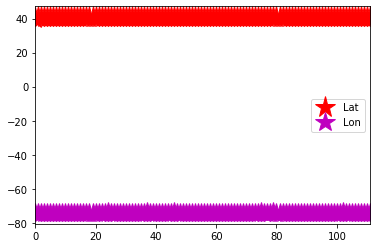

In [100]:
plot(df['Lat'], '*', ms=22, color='r', label='Lat')
legend(loc='upper right')
# twiny()
plot(df['Lon'], '*', ms=20, color='m', label='Lon')
legend(loc='center right')

xlim(0,111)

(-74.7, -72.8)

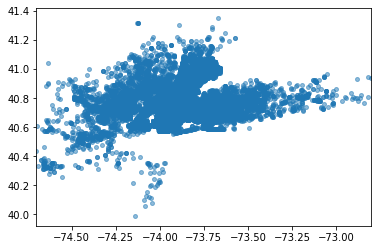

In [105]:
plot(df['Lon'], df['Lat'], '.', ms=8, alpha=.5)
xlim(-74.7, -72.8)